In [4]:
import pandas as pd

files = [
    'C://Users//Mark//Downloads//02-14-2022.csv',
    'C://Users//Mark//Downloads//03-09-2022.csv',
    'C://Users//Mark//Downloads//02-14-2023.csv',
    'C://Users//Mark//Downloads//03-09-2023.csv'
]

dfs = {}

for i, file in enumerate(files, start=1):
    df = pd.read_csv(file)
    df = df[['Country_Region', 'Last_Update', 'Confirmed', 'Deaths']]
    df = df.groupby('Country_Region')[['Confirmed', 'Deaths']].sum().reset_index()
    dfs[f'{i}'] = df
    print(f"File: {i} | {file.split('/')[-1].replace('.csv', '')}")
    print(df)

File: 1 | 02-14-2022
           Country_Region  Confirmed  Deaths
0             Afghanistan     171246    7501
1                 Albania     268304    3414
2                 Algeria     262165    6744
3                 Andorra      37277     149
4                  Angola      98514    1898
..                    ...        ...     ...
196    West Bank and Gaza     613846    5283
197  Winter Olympics 2022        501       0
198                 Yemen      11679    2107
199                Zambia     309579    3938
200              Zimbabwe     231603    5374

[201 rows x 3 columns]
File: 2 | 03-09-2022
           Country_Region  Confirmed  Deaths
0             Afghanistan     175525    7636
1                 Albania     272412    3483
2                 Algeria     265346    6860
3                 Andorra      38794     152
4                  Angola      98855    1900
..                    ...        ...     ...
196    West Bank and Gaza     652763    5588
197  Winter Olympics 2022        5

In [5]:
countries = ["China", "Russia", "Chile", "Germany", "Philippines", "Mexico"]

for key, (file, df) in enumerate(zip({file.split('/')[-1].replace('.csv', '')}, dfs.values()), start=1):
    print(f"File: {key} {file}")
    for country in countries:
        confirmed = df.loc[df['Country_Region'] == country, 'Confirmed'].values[0]
        deaths = df.loc[df['Country_Region'] == country, 'Deaths'].values[0]
        print(f"{country}'s Cases: {confirmed}")
        print(f"{country}'s Deaths: {deaths}")
    print("\n")

File: 1 03-09-2023
China's Cases: 146700
China's Deaths: 4857
Russia's Cases: 14102736
Russia's Deaths: 334093
Chile's Cases: 2652713
Chile's Deaths: 40666
Germany's Cases: 12469534
Germany's Deaths: 119977
Philippines's Cases: 3639942
Philippines's Deaths: 55094
Mexico's Cases: 5292706
Mexico's Deaths: 312819




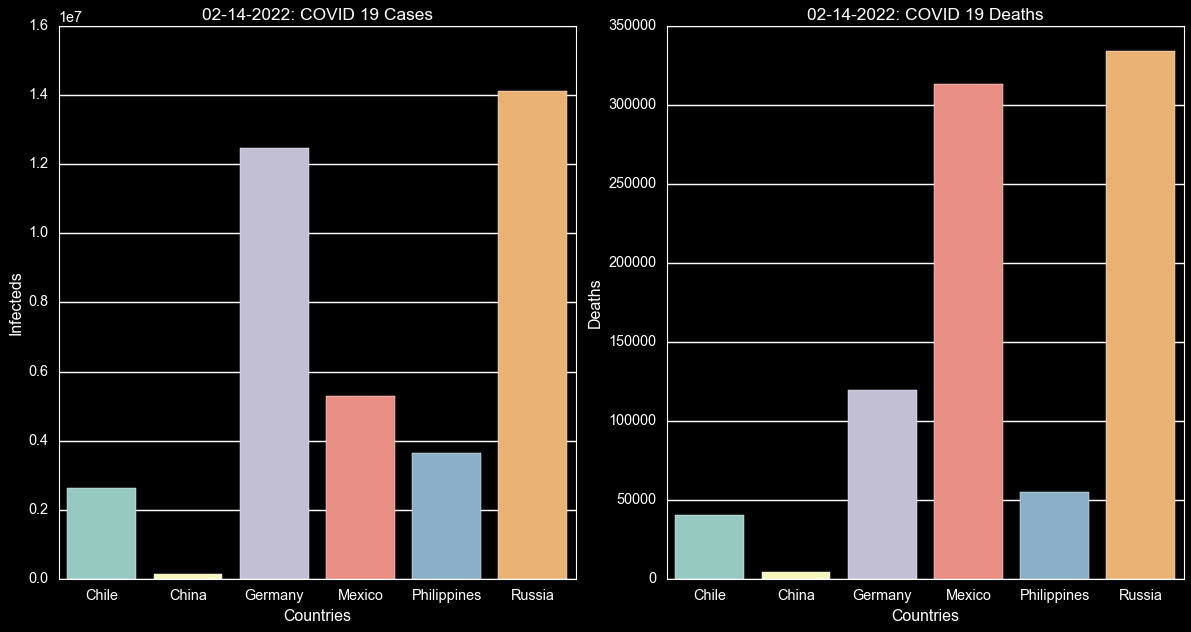

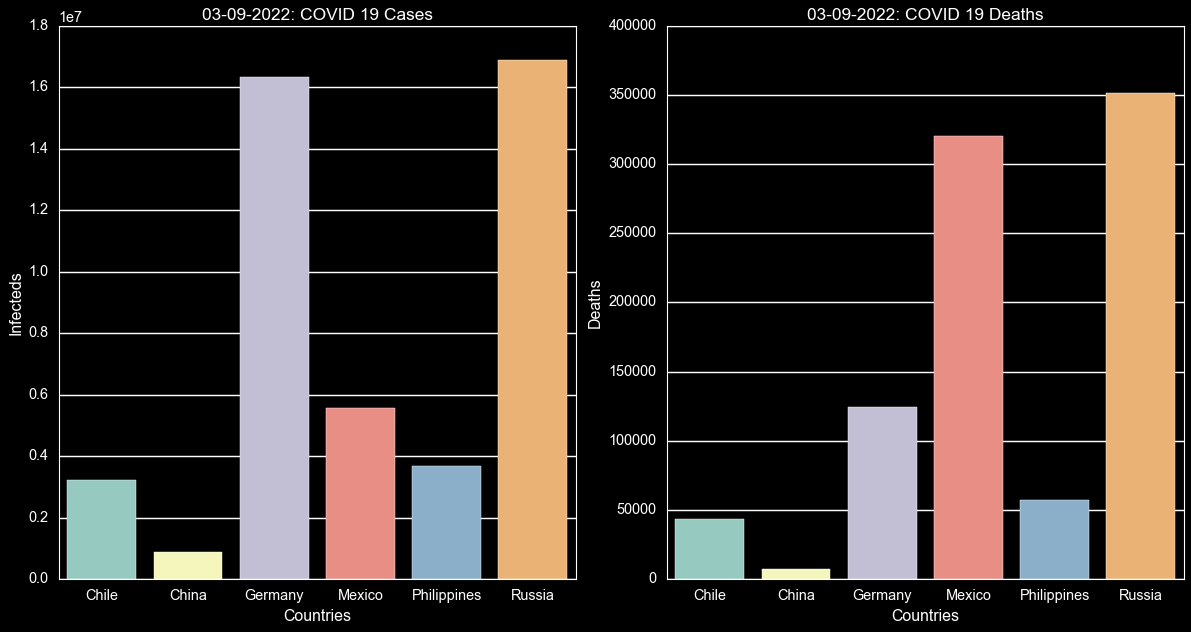

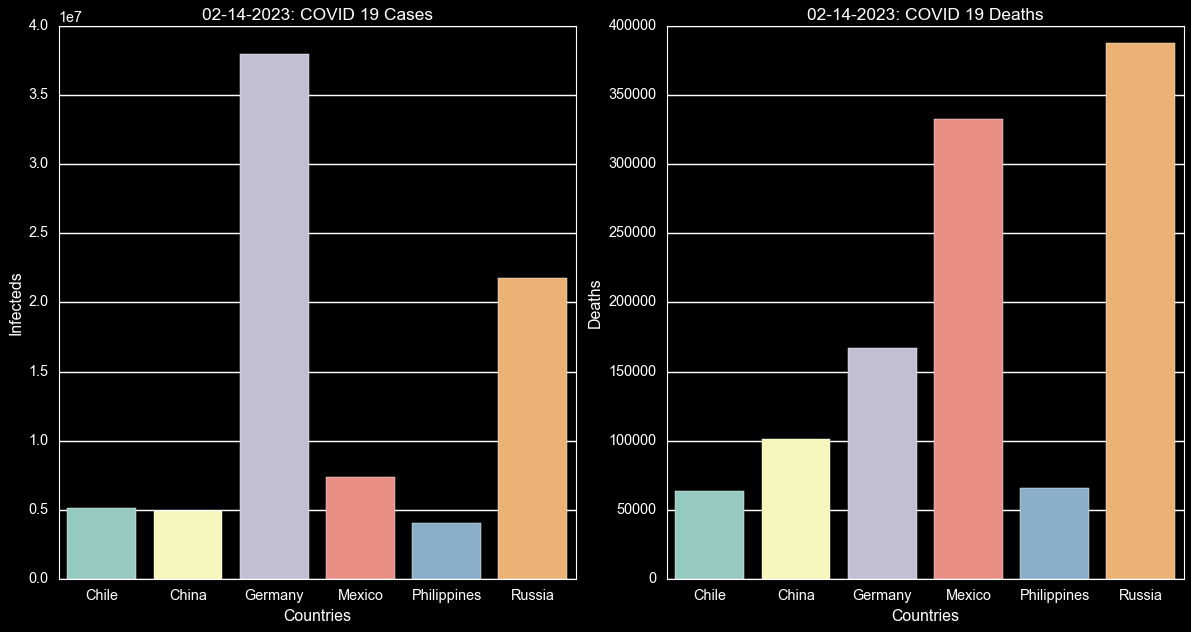

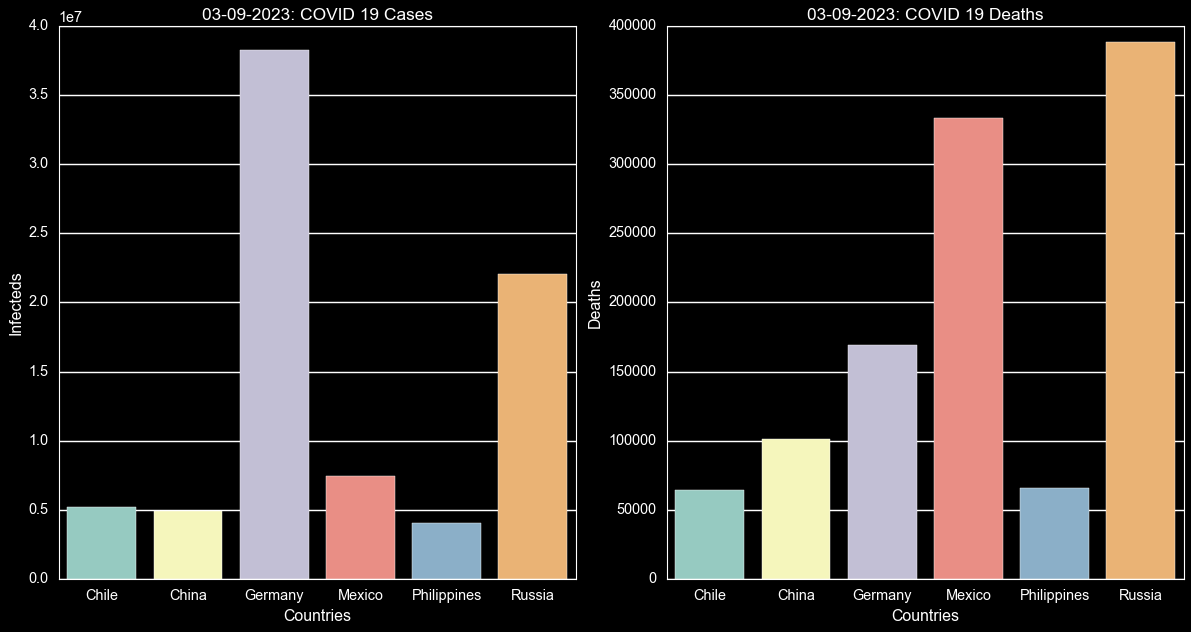

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
countries = ["China", "Russia", "Chile", "Germany", "Philippines", "Mexico"]

for file in files:
    df = pd.read_csv(file)
    df = df[['Country_Region', 'Last_Update', 'Confirmed', 'Deaths']]
    df = df.groupby('Country_Region')[['Confirmed', 'Deaths']].sum().reset_index()
    df_filter = df[df['Country_Region'].isin(countries)]
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.barplot(data=df_filter, x='Country_Region', y='Confirmed')
    plt.title(f"{file.split('/')[-1].replace('.csv', '')}: COVID 19 Cases")
    plt.xlabel("Countries")
    plt.ylabel("Infecteds")
    plt.subplot(1, 2, 2)
    sns.barplot(data=df_filter, x='Country_Region', y='Deaths')
    plt.title(f"{file.split('/')[-1].replace('.csv', '')}: COVID 19 Deaths")
    plt.xlabel("Countries")
    plt.ylabel("Deaths")
    plt.tight_layout()
    plt.show()

In [88]:
for i, file in enumerate(files, start=1):
    df = pd.read_csv(file)
    df = df[['Country_Region', 'Last_Update', 'Confirmed', 'Deaths']]
    df = df.groupby('Country_Region')[['Confirmed', 'Deaths']].sum().reset_index()
    dfs[f'df{i}'] = df
    print(f"File number: {i} | {file.split('/')[-1].replace('.csv', '')}")
    print(df)
    print("\n")

File number: 1 | 02-14-2022
           Country_Region  Confirmed  Deaths
0             Afghanistan     171246    7501
1                 Albania     268304    3414
2                 Algeria     262165    6744
3                 Andorra      37277     149
4                  Angola      98514    1898
..                    ...        ...     ...
196    West Bank and Gaza     613846    5283
197  Winter Olympics 2022        501       0
198                 Yemen      11679    2107
199                Zambia     309579    3938
200              Zimbabwe     231603    5374

[201 rows x 3 columns]


File number: 2 | 03-09-2022
           Country_Region  Confirmed  Deaths
0             Afghanistan     175525    7636
1                 Albania     272412    3483
2                 Algeria     265346    6860
3                 Andorra      38794     152
4                  Angola      98855    1900
..                    ...        ...     ...
196    West Bank and Gaza     652763    5588
197  Winter Olympi

In [7]:
for i, file in enumerate(files, start=1):
    df = pd.read_csv(file)
    df = df[['Country_Region', 'Last_Update', 'Confirmed', 'Deaths']]
    df = df.groupby('Country_Region')[['Confirmed', 'Deaths']].sum().reset_index()
    
    df['CFR (%)'] = (df['Deaths'] / df["Confirmed"]) * 100
    df = df[df['CFR (%)'] <= 100]

    df_sorted = df.sort_values('CFR (%)', ascending=False).head(20)
    
    dfs[f'df{i}'] = df_sorted
    print(f"Top 20 CFR (%) in File {i}: | {file.split('/')[-1].replace('.csv', '')}")
    print(df_sorted)
    print("\n")

Top 20 CFR (%) in File 1: | 02-14-2022
             Country_Region  Confirmed  Deaths    CFR (%)
107              MS Zaandam          9       2  22.222222
198                   Yemen      11679    2107  18.040928
193                 Vanuatu          7       1  14.285714
169                   Sudan      59903    3831   6.395339
141                    Peru    3449712  208466   6.042997
117                  Mexico    5292706  312819   5.910379
174                   Syria      52881    3032   5.733628
54                    Egypt     457081   23409   5.121412
164                 Somalia      26203    1340   5.113918
53                  Ecuador     799140   35036   4.384213
0               Afghanistan     171246    7501   4.380248
175                 Taiwan*      19621     851   4.337190
22   Bosnia and Herzegovina     364610   15096   4.140314
102                 Liberia       7359     290   3.940753
28                    Burma     548357   19311   3.521611
131                   Niger      

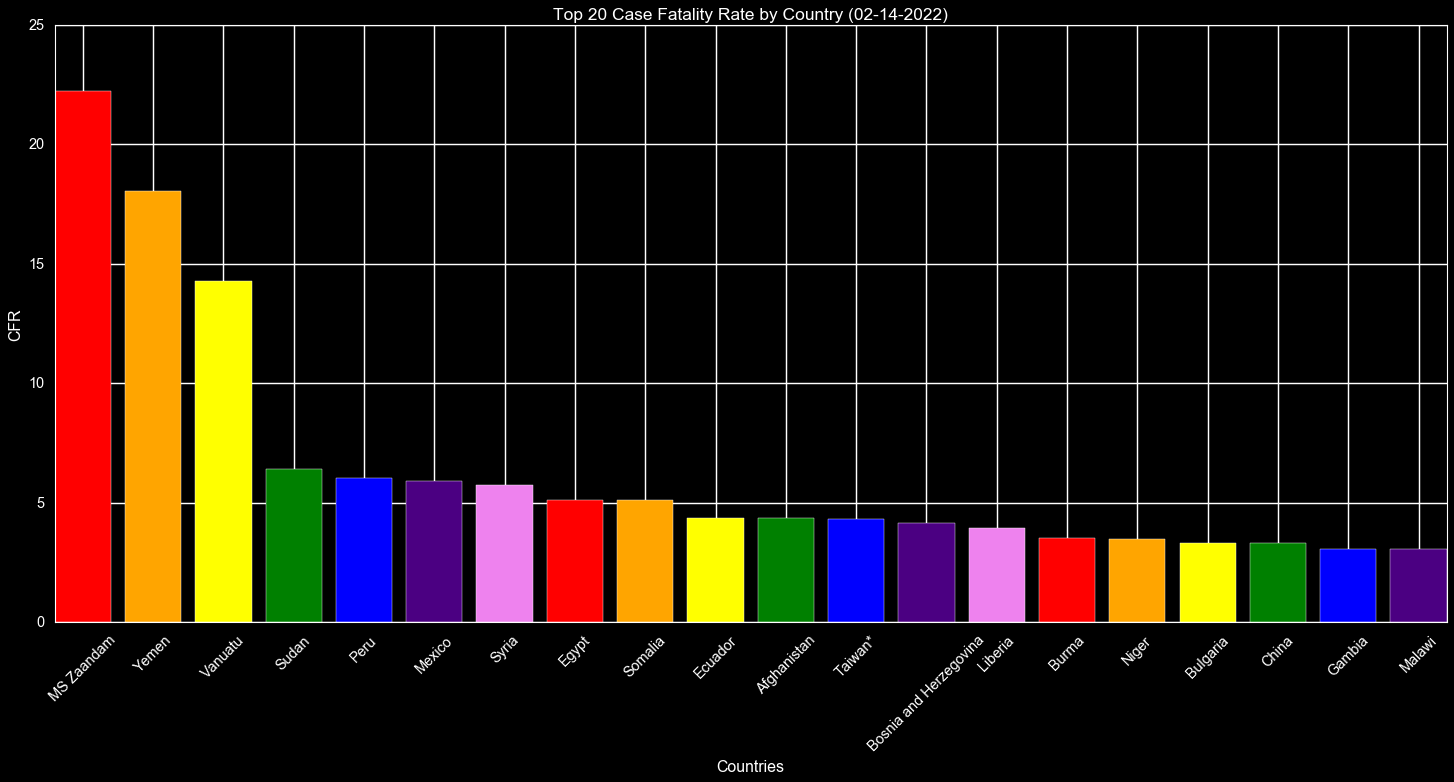

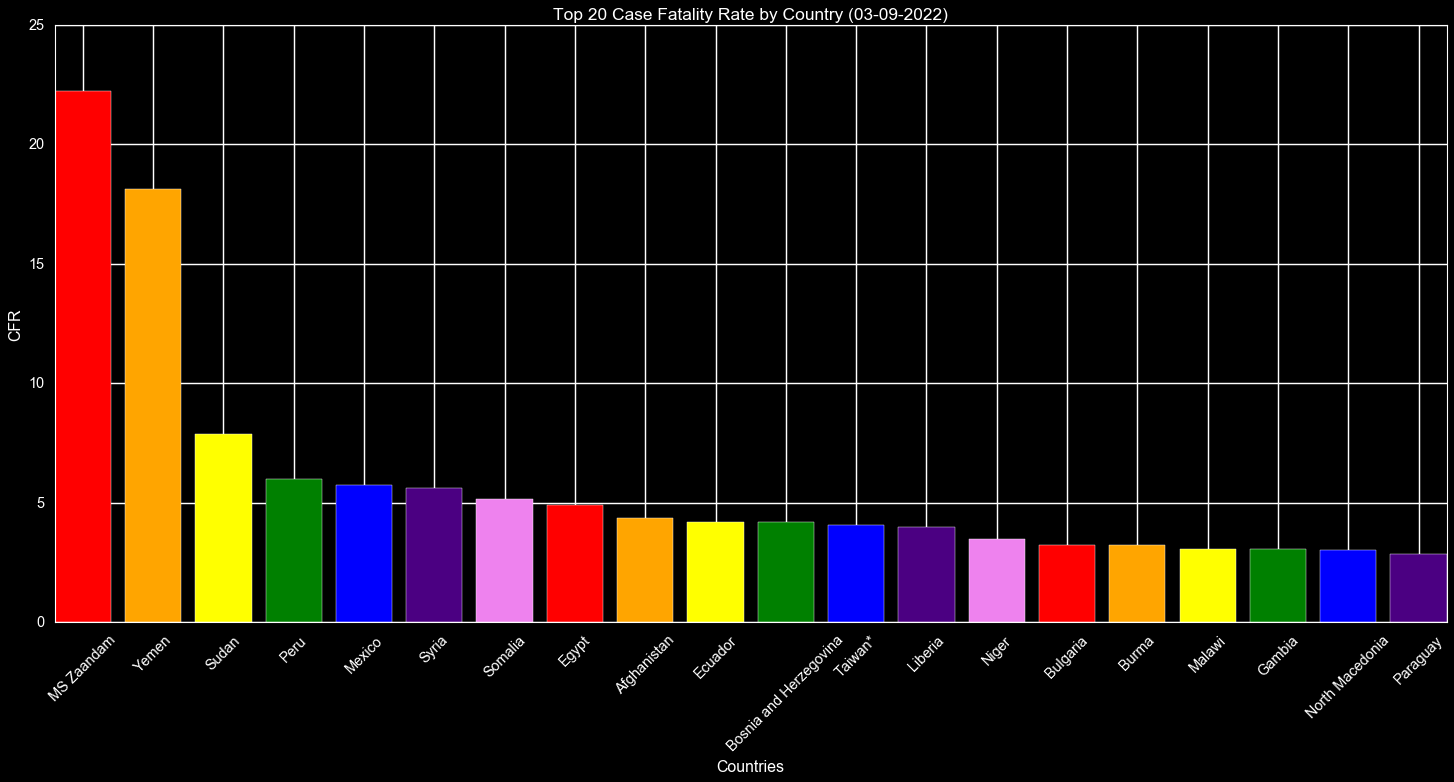

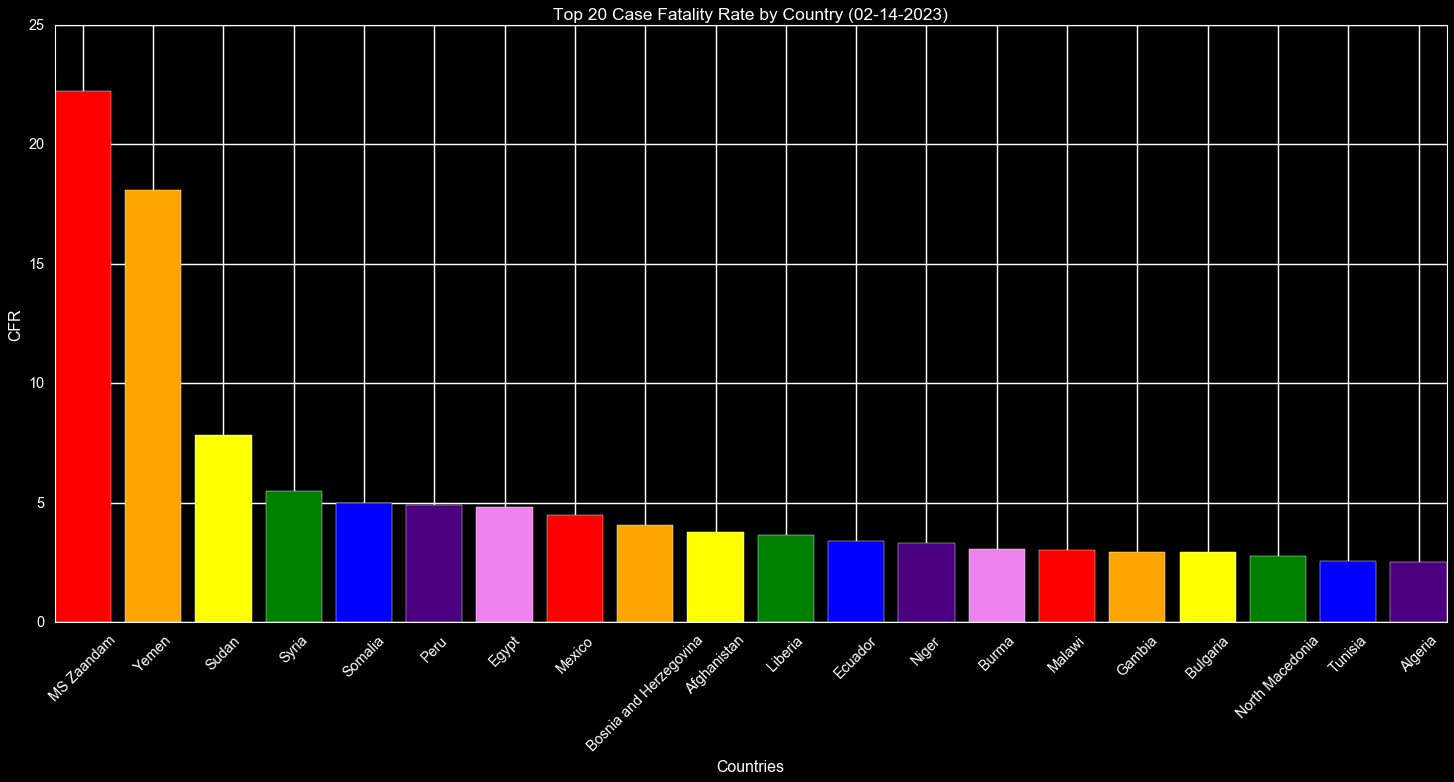

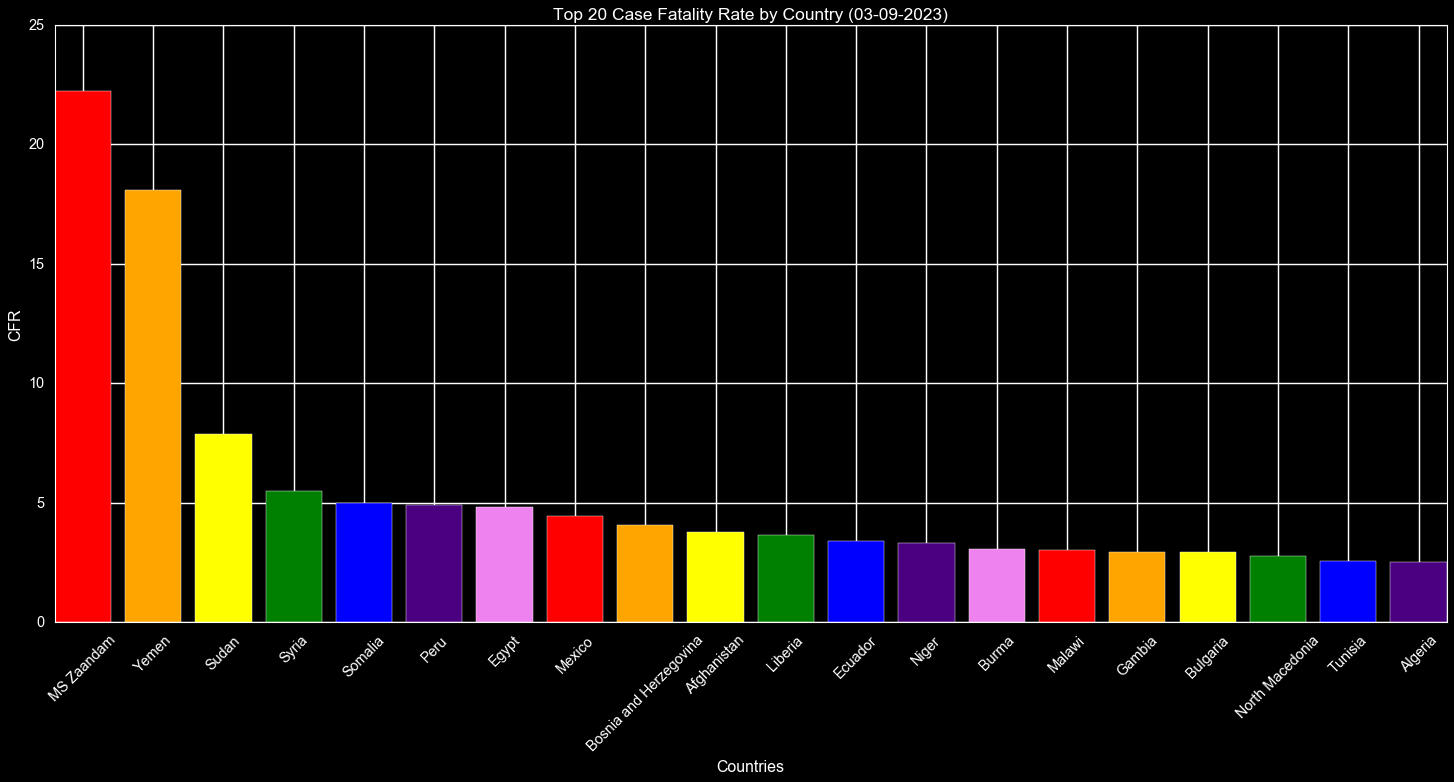

In [12]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

for i, file in enumerate(files, start=1):
    df = pd.read_csv(file)
    df = df[['Country_Region', 'Last_Update', 'Confirmed', 'Deaths']]
    df = df.groupby('Country_Region')[['Confirmed', 'Deaths']].sum().reset_index()
    df['CFR (%)'] = (df['Deaths'] / df["Confirmed"]) * 100
    df = df[df['CFR (%)'] <= 100]
    top_countries = df.sort_values('CFR (%)', ascending=False).head(20)
    bar_colors = [colors[i % 7] for i, country in enumerate(top_countries['Country_Region'])]
    plt.style.use('dark_background')
    plt.figure(figsize=(20, 9))
    plt.bar(top_countries['Country_Region'], top_countries['CFR (%)'], color=bar_colors)
    plt.xlabel("Countries")
    plt.ylabel("CFR")
    plt.title(f"Top 20 Case Fatality Rate by Country ({file.split('/')[-1].replace('.csv', '')})")
    plt.xticks(rotation=45)
    plt.show()